Зависимость возраста на низкий доход

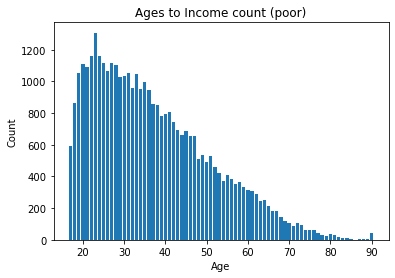

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jul  8 15:51:26 2022

@author: vladislav
"""
import pandas
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

data = pandas.read_csv('./adult.csv', delimiter=(','))

labelEncoder = LabelEncoder()
labelEncoder.fit(data['income'])
transformedIncome = pandas.Series(data = labelEncoder.transform(data['income']))
data['income'] = transformedIncome

poors = data[data.income == 0]
poors = poors.reset_index()

hashmap = dict()
for index, row in poors.iterrows():
    if hashmap.get(row['age']) == None:
        hashmap[row['age']]=1
    else:
        hashmap[row['age']]=hashmap.get(row['age'])+1

plt.bar(hashmap.keys(), hashmap.values())
plt.title("Ages to Income count (poor)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Зависимость возраста на высокий доход

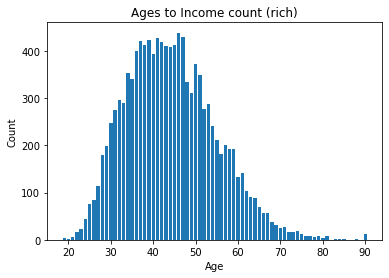

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jul  8 15:59:26 2022

@author: vladislav
"""
import pandas
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

data = pandas.read_csv('./adult.csv', delimiter=(','))

labelEncoder = LabelEncoder()
labelEncoder.fit(data['income'])
transformedIncome = pandas.Series(data = labelEncoder.transform(data['income']))
data['income'] = transformedIncome

riches = data[data.income > 0]
riches = riches.reset_index()

hashmap = dict()
for index, row in riches.iterrows():
    if hashmap.get(row['age']) == None:
        hashmap[row['age']]=1
    else:
        hashmap[row['age']]=hashmap.get(row['age'])+1

plt.bar(hashmap.keys(), hashmap.values())
plt.title("Ages to Income count (rich)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Обучение модели логистической регрессии и SVM

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jul  6 15:37:27 2022

@author: vladislav
"""

import numpy
import operator
import pandas
import scipy.stats
import seaborn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

data = pandas.read_csv('./adult.csv', delimiter=(','))

labelEncoder = LabelEncoder()
labelEncoder.fit(data['income'])
transformedIncome = pandas.Series(data = labelEncoder.transform(data['income']))
data['income'] = transformedIncome
labelEncoder.fit(data['gender'])
transformedGender = pandas.Series(data = labelEncoder.transform(data['gender']))
data['gender'] = transformedGender

targetData = pandas.get_dummies(data.loc[:, ['age', 'hours-per-week', 'educational-num', 'gender', 'race', 'capital-gain', 'capital-loss']])
Y = data['income']

X_train, X_test, Y_train, Y_test = train_test_split(targetData, Y, test_size=0.2)

logRegModel = LogisticRegression(max_iter=1000)
logRegModel.fit(X_train, Y_train)
print('LogisticRegression Score: ', logRegModel.score(X_test,Y_test))

svcModel = SVC(gamma='auto')
svcModel.fit(X_train, Y_train)
print('SVM Score: ', svcModel.score(X_test,Y_test))


LogisticRegression Score:  0.8209642747466476
SVM Score:  0.8365236974101751


Вывод score показывает, что в классическом варианте SVM может угадывать лучше на ~2%, однако выполняется в разы дольше.

LogisticRegression Score:  0.8223973794656567
SVM Score:  0.8394922714709796